In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

## Data Reading and Understanding

In [251]:
df = pd.read_csv("/content/day.csv")
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [252]:
df = df.drop(["dteday","instant","registered","casual"], axis = 1) # derived metrics are already there

In [253]:
# Map
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Apply
df["season"] = df["season"].map(season_mapping)

# Map
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

# Apply
df['weathersit'] = df['weathersit'].map(weather_mapping)

# Map
yr_mapping = {
    0: 2018,
    1: 2019,
}

# Apply
df['yr'] = df['yr'].map(yr_mapping)


In [254]:
# Check for any missing values
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## EDA

### Univaritate

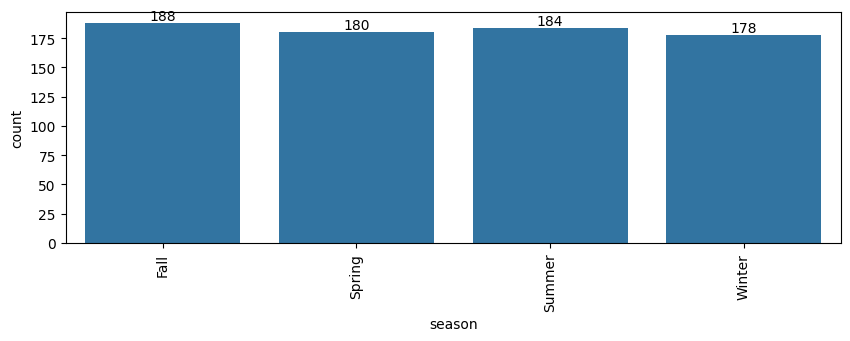

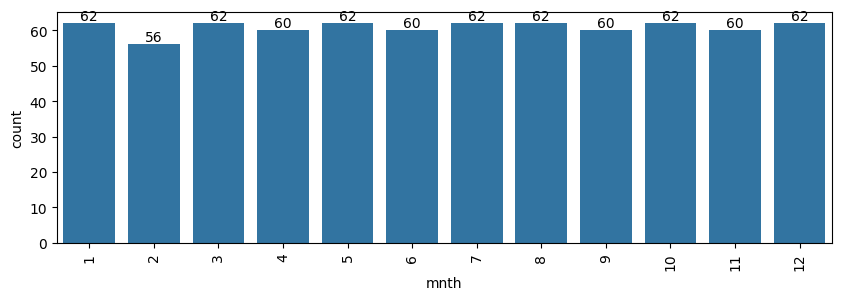

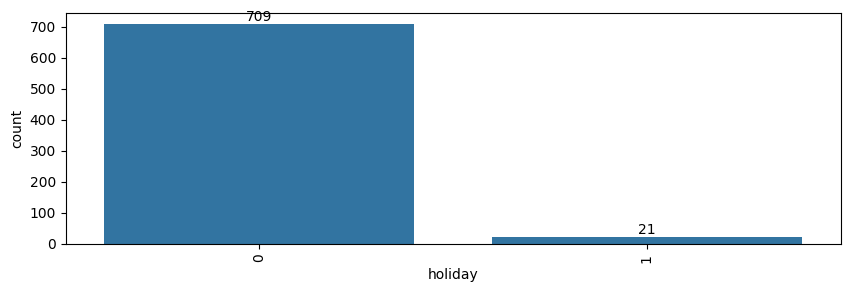

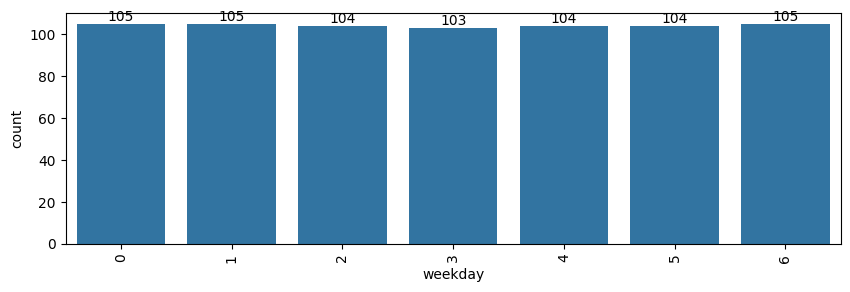

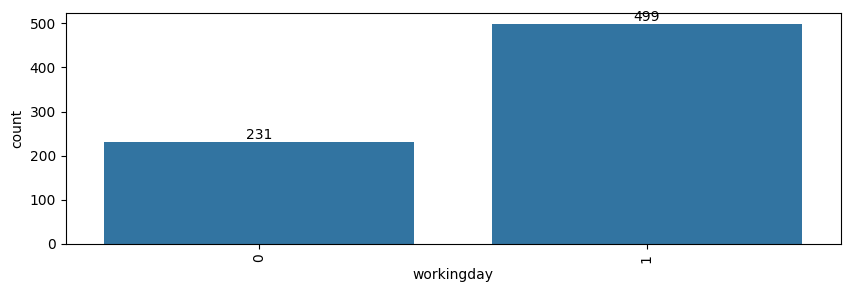

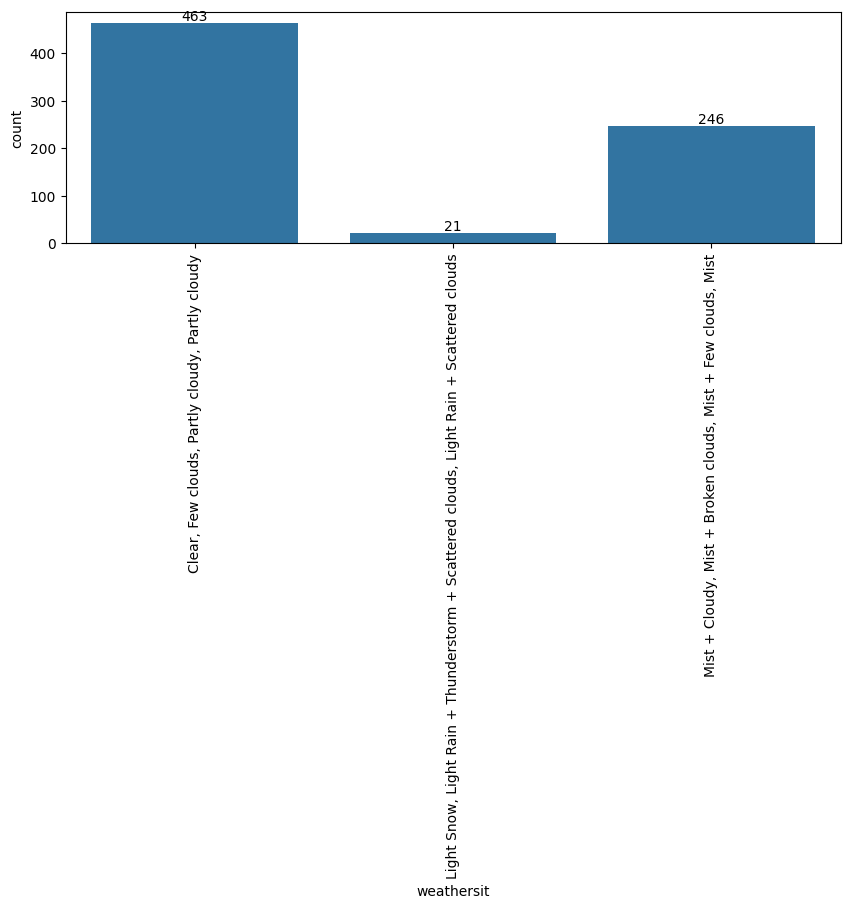

In [255]:
cat_cols = ["season","mnth", "holiday","weekday","workingday","weathersit"]
num_cols = ["temp","yr","atemp","hum", "windspeed"]

for col in cat_cols:
    df[col] = df[col].astype('category')
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x=df[col])
    plt.xticks(rotation=90)

    # Add count values on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    plt.show()

Median: 20.47
q1: 13.81
q3: 26.88


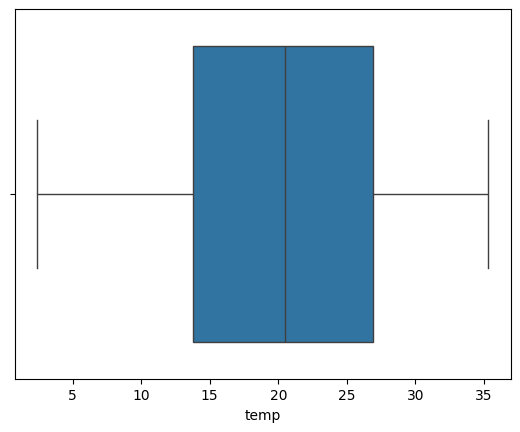

Median: 2018.50
q1: 2018.00
q3: 2019.00


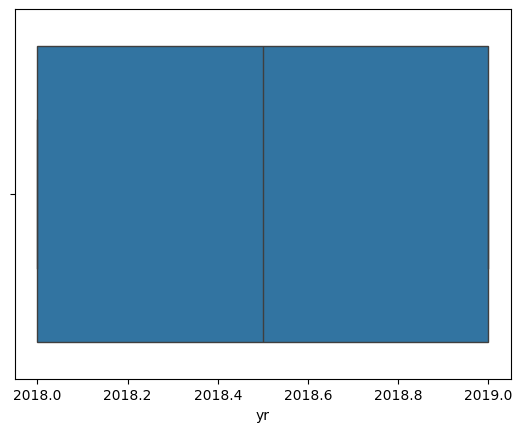

Median: 24.37
q1: 16.89
q3: 30.45


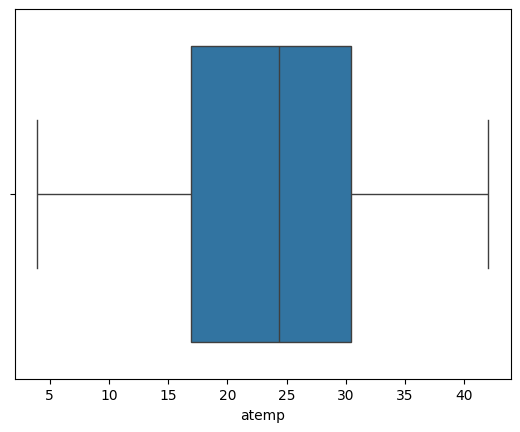

Median: 62.62
q1: 52.00
q3: 72.99


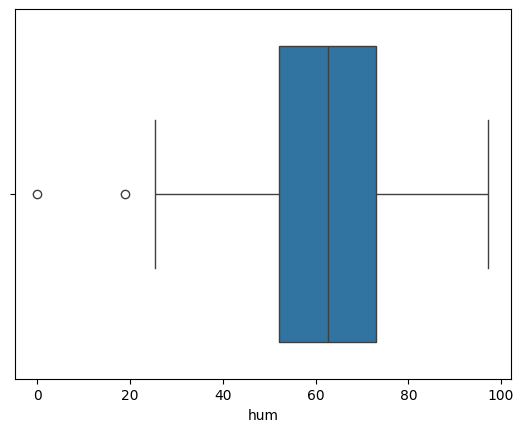

Median: 12.13
q1: 9.04
q3: 15.63


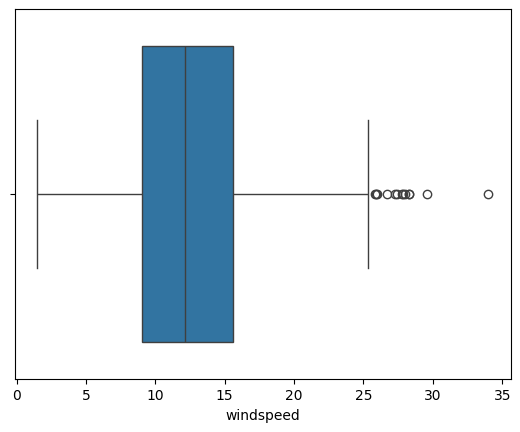

In [256]:
# univariate analysis of numerical columns
for col in num_cols:

    # Create boxplot
    sns.boxplot(data=df, x=col)

    # Calculate median and IQR
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    # Annotate plot with median and IQR values
    #plt.text(0, median + 0.5, f'Median: {median:.2f}\nq1: {q1:.2f}\nq3: {q3:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    print(f'Median: {median:.2f}\nq1: {q1:.2f}\nq3: {q3:.2f}')
    plt.show()

### Bivariate Analysis

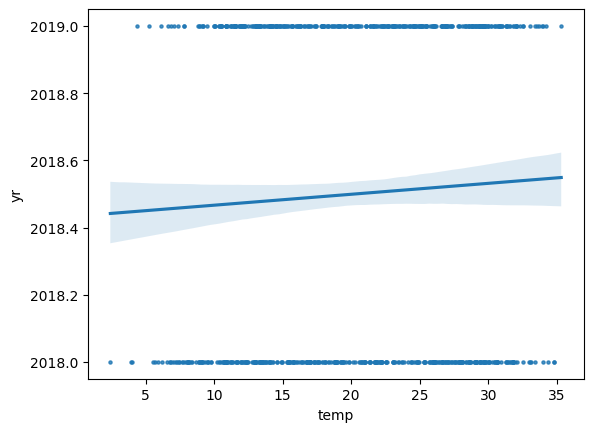

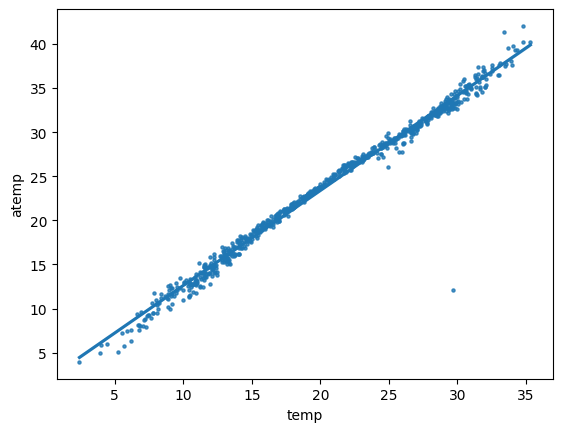

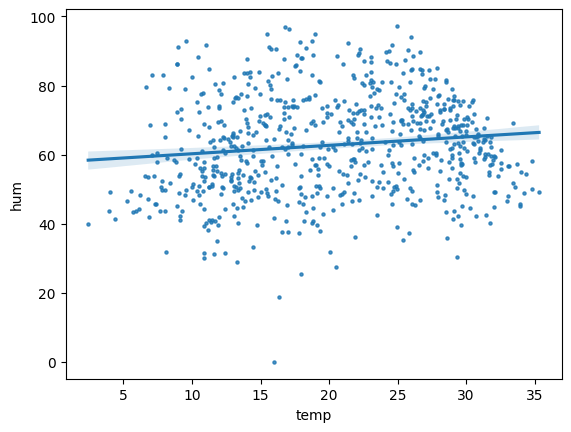

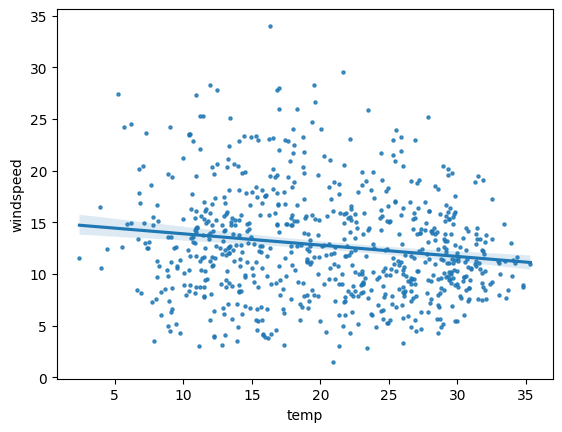

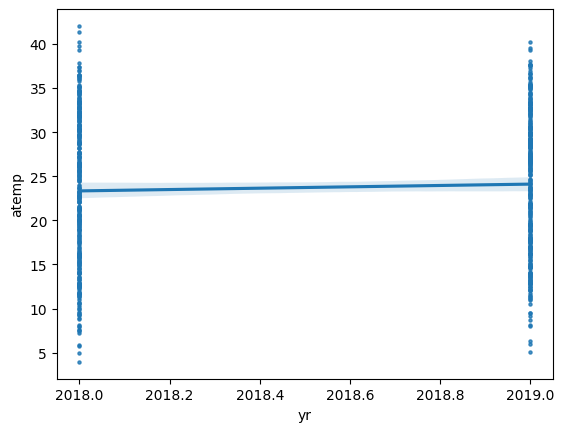

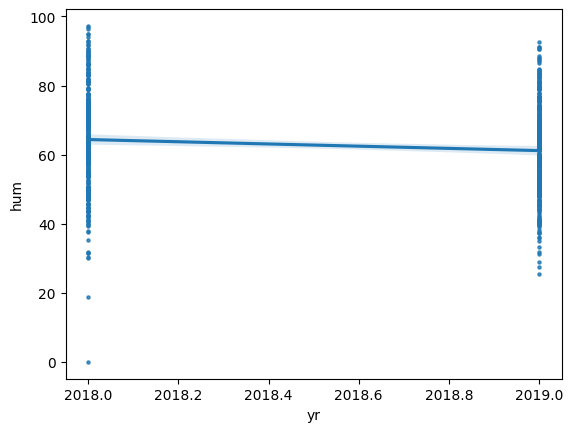

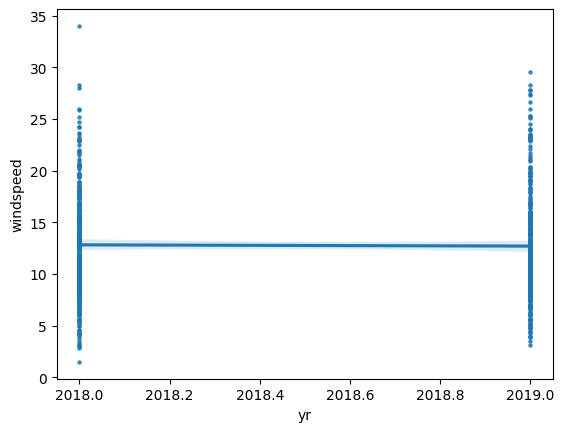

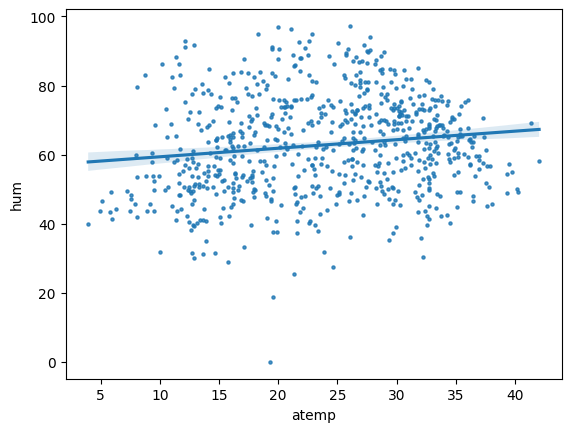

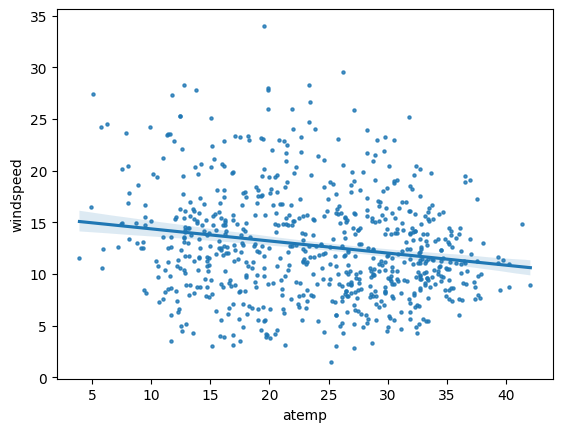

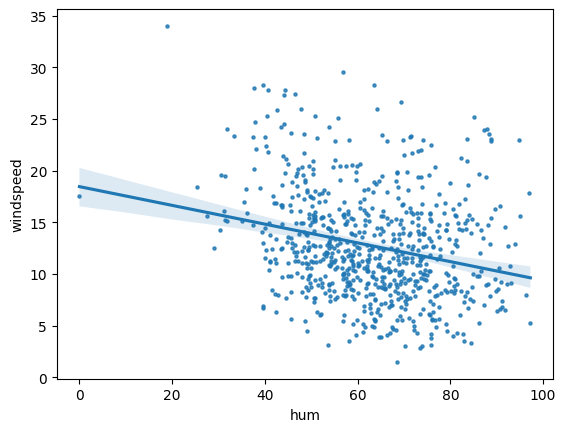

In [257]:
# bivariate analysis of numerical columns
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        #sns.scatterplot(x=df[num_cols[i]], y=df[num_cols[j]])
        sns.regplot(x=df[num_cols[i]], y=df[num_cols[j]], scatter_kws={"s": 5})  # scatter_kws sets the size of the points
        plt.show()

Median: 29.30
q1: 27.35
q3: 30.76
Median: 11.71
q1: 9.11
q3: 14.85
Median: 23.05
q1: 18.78
q3: 25.90
Median: 16.78
q1: 13.58
q3: 21.06


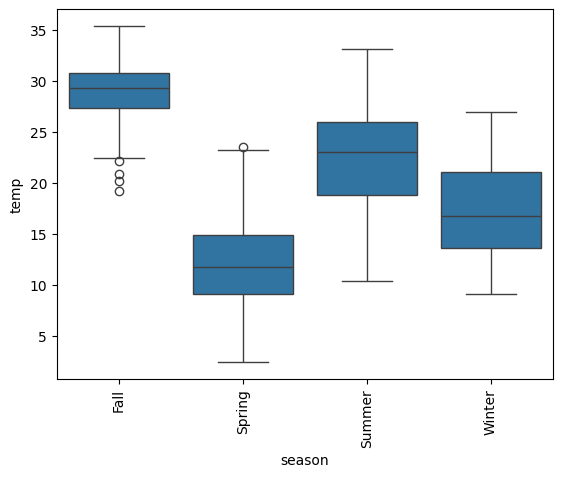

Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00


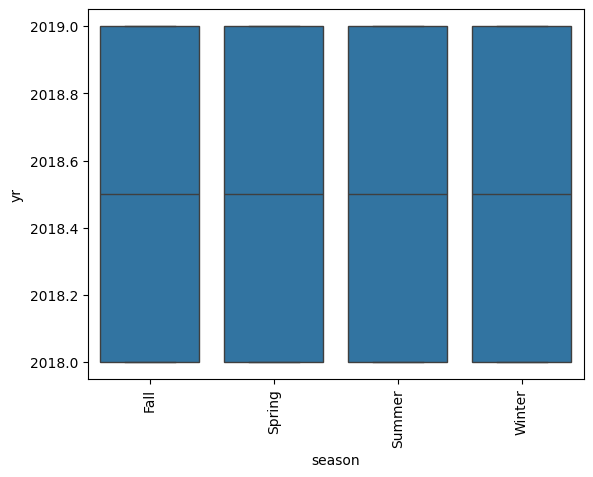

Median: 32.83
q1: 30.93
q3: 34.90
Median: 14.13
q1: 11.61
q3: 17.99
Median: 26.91
q1: 22.48
q3: 29.74
Median: 20.47
q1: 16.89
q3: 25.16


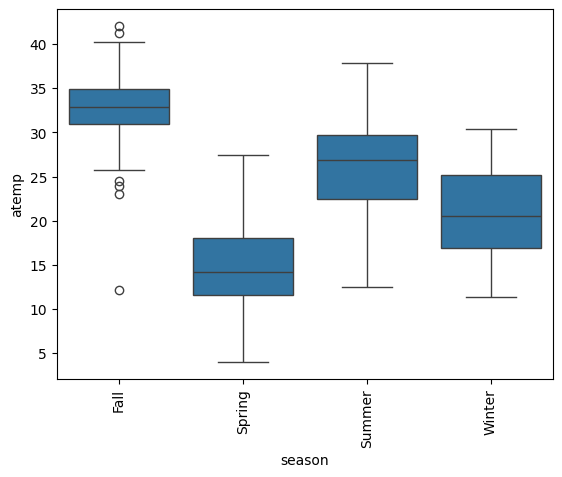

Median: 63.50
q1: 55.08
q3: 71.26
Median: 54.38
q1: 48.32
q3: 69.34
Median: 64.44
q1: 50.09
q3: 74.17
Median: 66.10
q1: 57.07
q3: 75.69


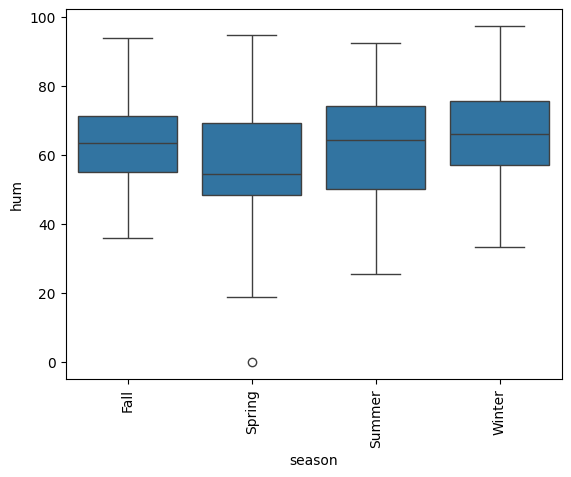

Median: 11.06
q1: 8.78
q3: 14.00
Median: 13.60
q1: 10.39
q3: 17.09
Median: 13.00
q1: 9.86
q3: 16.71
Median: 11.19
q1: 7.13
q3: 15.25


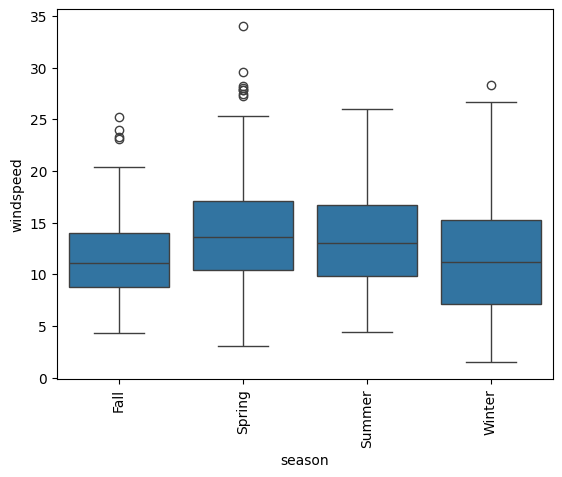

Median: 8.92
q1: 7.23
q3: 12.04
Median: 11.71
q1: 10.28
q3: 14.34
Median: 15.59
q1: 12.33
q3: 19.37
Median: 18.84
q1: 16.97
q3: 20.94
Median: 24.43
q1: 22.09
q3: 26.67
Median: 28.31
q1: 26.04
q3: 29.86
Median: 30.70
q1: 29.56
q3: 32.28
Median: 29.02
q1: 28.06
q3: 29.96
Median: 25.47
q1: 23.68
q3: 26.71
Median: 20.12
q1: 17.86
q3: 22.26
Median: 14.73
q1: 13.32
q3: 16.59
Median: 12.85
q1: 10.99
q3: 15.58


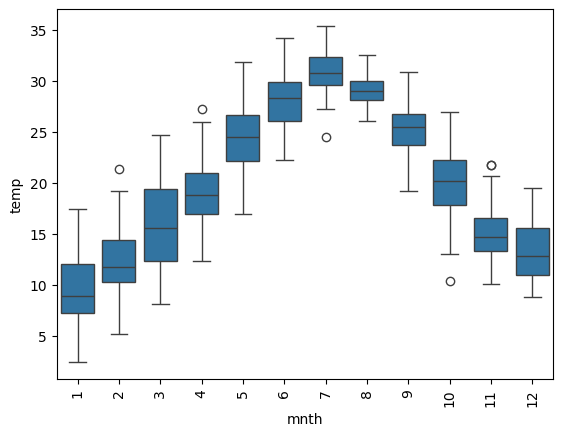

Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00


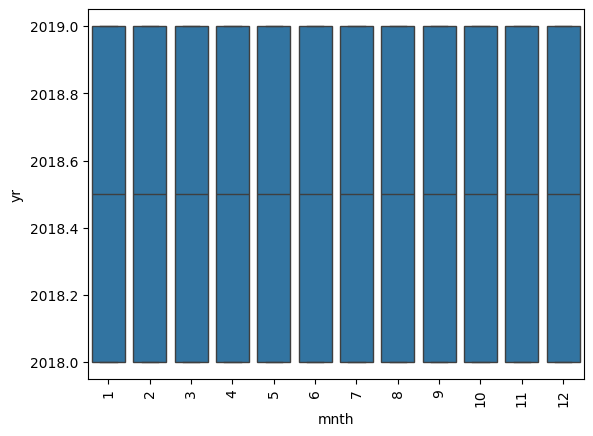

Median: 11.64
q1: 9.19
q3: 14.59
Median: 14.52
q1: 12.61
q3: 17.61
Median: 18.86
q1: 14.93
q3: 23.29
Median: 22.66
q1: 20.71
q3: 24.94
Median: 28.31
q1: 26.37
q3: 30.13
Median: 31.96
q1: 29.77
q3: 33.31
Median: 34.86
q1: 33.32
q3: 36.96
Median: 32.70
q1: 31.69
q3: 33.96
Median: 28.73
q1: 27.23
q3: 30.41
Median: 24.08
q1: 21.58
q3: 26.18
Median: 18.18
q1: 16.19
q3: 20.34
Median: 15.86
q1: 13.37
q3: 19.33


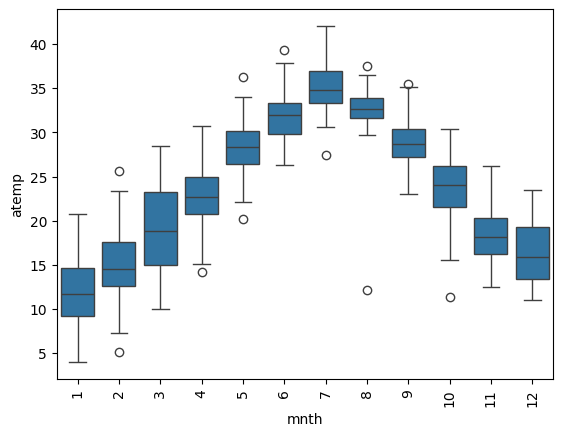

Median: 53.77
q1: 45.94
q3: 70.03
Median: 53.79
q1: 48.43
q3: 67.47
Median: 58.02
q1: 47.72
q3: 73.81
Median: 56.96
q1: 46.40
q3: 72.00
Median: 70.73
q1: 63.20
q3: 76.49
Median: 57.79
q1: 49.43
q3: 65.55
Median: 59.56
q1: 52.15
q3: 66.44
Median: 63.92
q1: 57.20
q3: 71.27
Median: 71.08
q1: 63.55
q3: 81.16
Median: 70.25
q1: 62.79
q3: 76.15
Median: 61.71
q1: 53.95
q3: 69.93
Median: 64.02
q1: 56.42
q3: 76.38


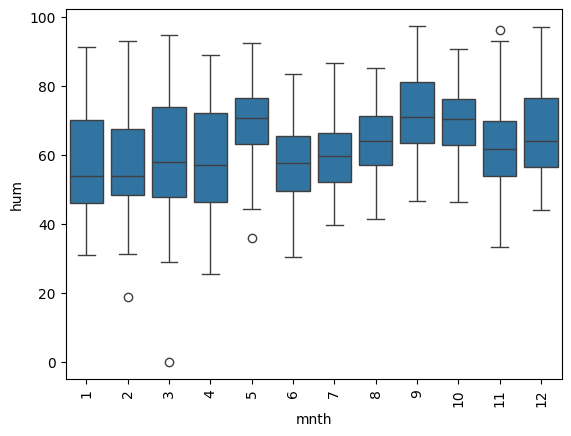

Median: 12.73
q1: 10.59
q3: 16.61
Median: 13.37
q1: 10.67
q3: 17.54
Median: 14.77
q1: 11.77
q3: 16.68
Median: 15.67
q1: 11.53
q3: 19.87
Median: 11.69
q1: 8.97
q3: 15.24
Median: 11.52
q1: 9.67
q3: 14.12
Median: 11.04
q1: 9.23
q3: 12.82
Median: 11.17
q1: 8.64
q3: 14.39
Median: 10.17
q1: 7.92
q3: 13.94
Median: 11.17
q1: 7.19
q3: 15.28
Median: 11.81
q1: 8.40
q3: 15.85
Median: 11.11
q1: 6.88
q3: 15.62


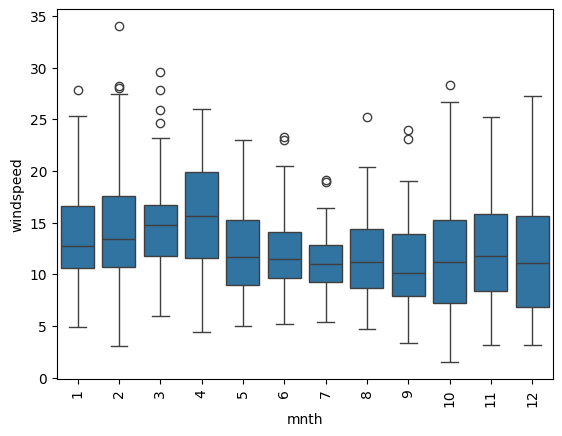

Median: 20.60
q1: 14.01
q3: 26.86
Median: 15.72
q1: 12.44
q3: 27.61


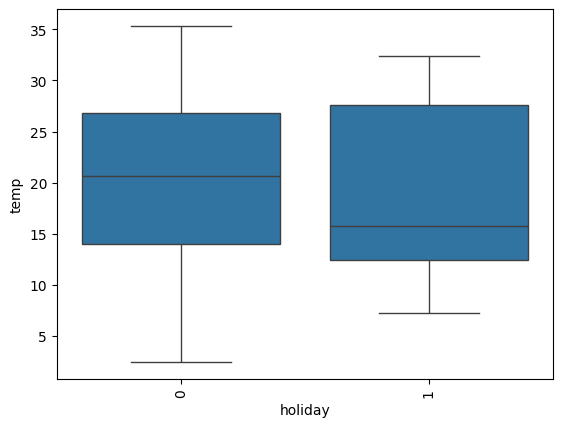

Median: 2018.00
q1: 2018.00
q3: 2019.00
Median: 2019.00
q1: 2018.00
q3: 2019.00


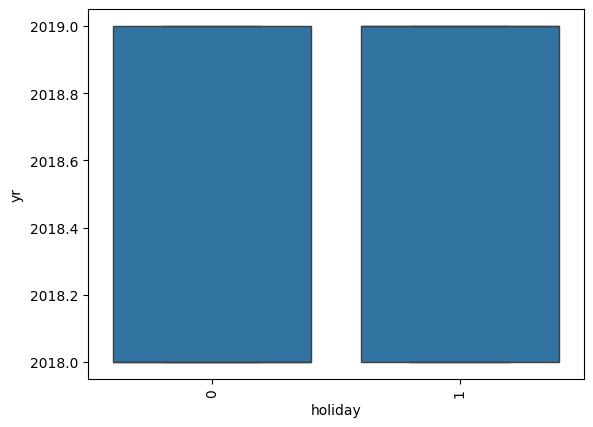

Median: 24.51
q1: 16.92
q3: 30.40
Median: 19.38
q1: 14.72
q3: 31.28


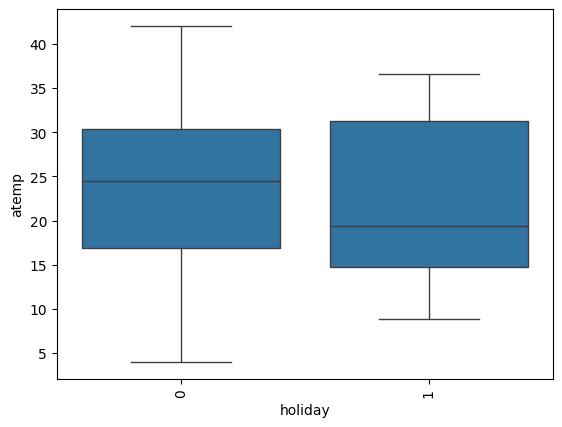

Median: 62.67
q1: 51.92
q3: 73.00
Median: 60.50
q1: 53.75
q3: 70.96


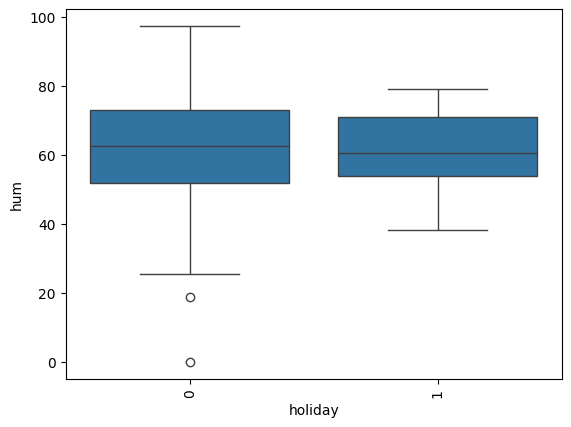

Median: 12.12
q1: 9.00
q3: 15.63
Median: 13.00
q1: 10.13
q3: 15.50


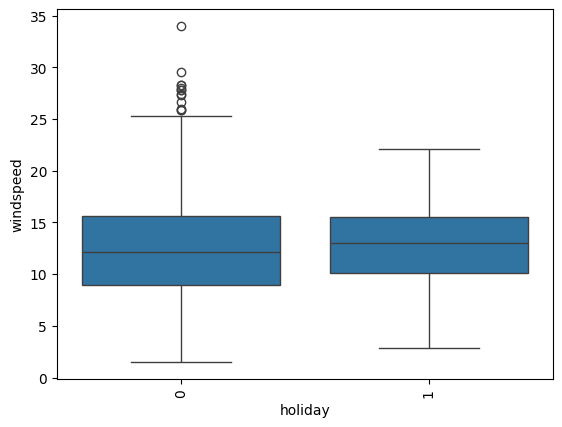

Median: 19.00
q1: 13.84
q3: 26.79
Median: 21.08
q1: 13.33
q3: 26.42
Median: 21.78
q1: 14.38
q3: 26.36
Median: 22.07
q1: 14.25
q3: 27.03
Median: 20.43
q1: 14.33
q3: 27.19
Median: 20.28
q1: 13.75
q3: 26.69
Median: 19.37
q1: 13.32
q3: 27.03


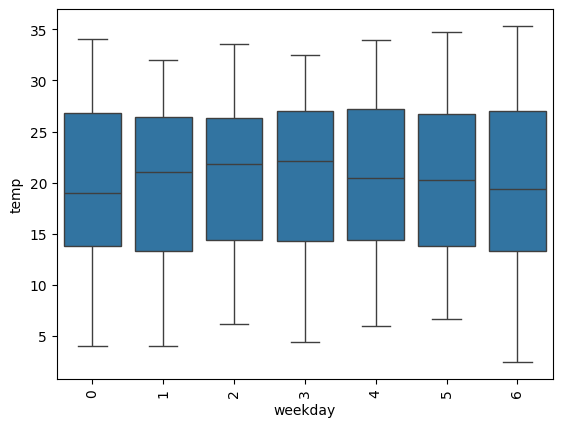

Median: 2019.00
q1: 2018.00
q3: 2019.00
Median: 2019.00
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.00
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.50
q1: 2018.00
q3: 2019.00
Median: 2018.00
q1: 2018.00
q3: 2019.00


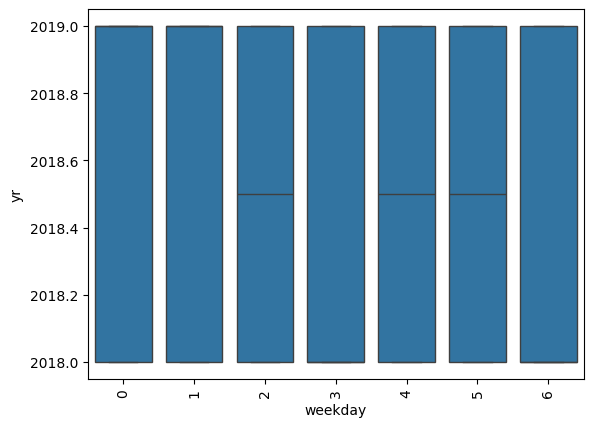

Median: 22.82
q1: 17.01
q3: 30.46
Median: 25.16
q1: 16.95
q3: 30.11
Median: 25.57
q1: 17.32
q3: 29.96
Median: 25.69
q1: 17.01
q3: 30.67
Median: 24.38
q1: 17.73
q3: 31.31
Median: 23.39
q1: 16.22
q3: 30.07
Median: 23.33
q1: 16.22
q3: 30.56


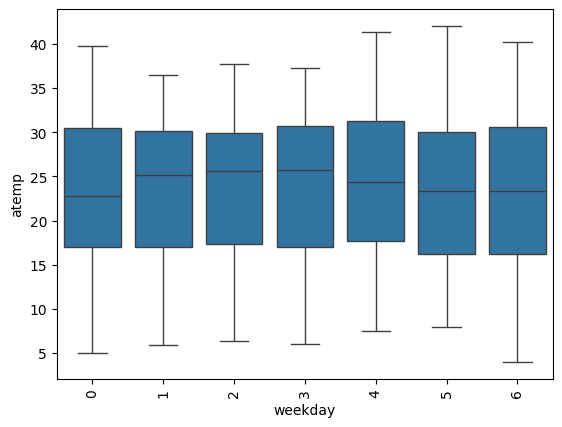

Median: 63.17
q1: 50.79
q3: 74.00
Median: 64.92
q1: 52.25
q3: 73.83
Median: 65.27
q1: 55.58
q3: 73.40
Median: 63.29
q1: 53.75
q3: 74.25
Median: 60.29
q1: 52.31
q3: 70.11
Median: 60.77
q1: 52.51
q3: 69.99
Median: 61.33
q1: 50.29
q3: 73.12


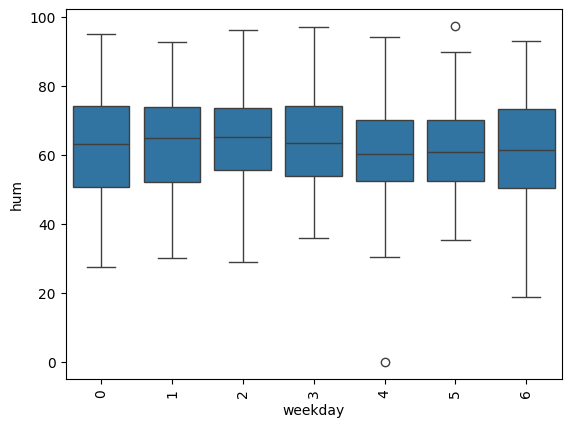

Median: 12.21
q1: 9.04
q3: 15.25
Median: 11.79
q1: 8.79
q3: 15.75
Median: 12.45
q1: 8.97
q3: 15.83
Median: 11.88
q1: 8.98
q3: 16.34
Median: 12.29
q1: 9.14
q3: 15.47
Median: 11.48
q1: 8.98
q3: 15.46
Median: 12.67
q1: 9.67
q3: 15.63


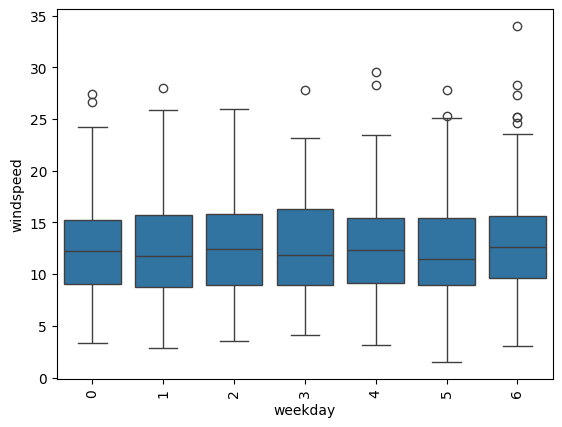

Median: 19.00
q1: 13.36
q3: 27.04
Median: 21.08
q1: 14.11
q3: 26.84


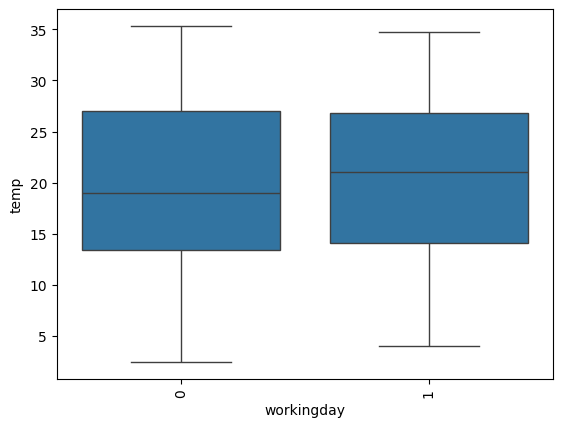

Median: 2019.00
q1: 2018.00
q3: 2019.00
Median: 2018.00
q1: 2018.00
q3: 2019.00


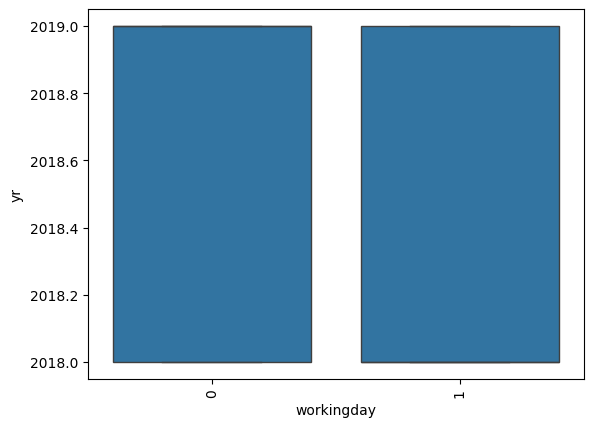

Median: 22.82
q1: 16.26
q3: 30.68
Median: 25.16
q1: 17.10
q3: 30.37


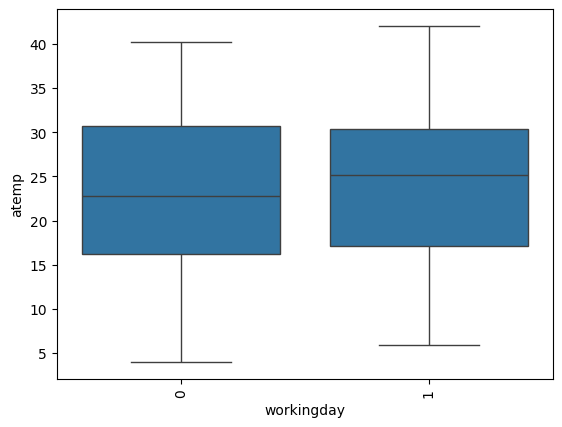

Median: 61.58
q1: 50.72
q3: 73.27
Median: 63.08
q1: 53.04
q3: 72.90


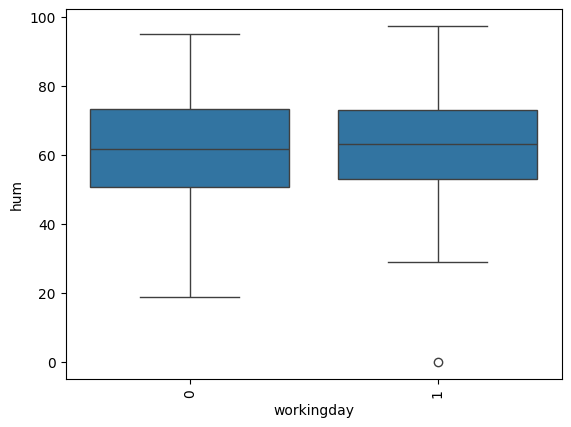

Median: 12.50
q1: 9.38
q3: 15.44
Median: 11.83
q1: 8.98
q3: 15.73


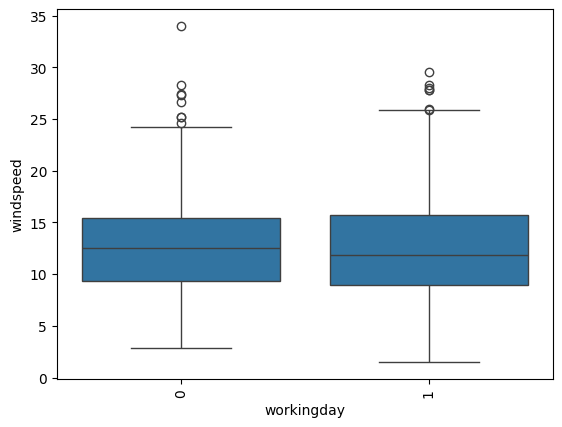

Median: 21.39
q1: 13.89
q3: 28.38
Median: 18.04
q1: 15.95
q3: 22.21
Median: 18.83
q1: 13.78
q3: 25.47


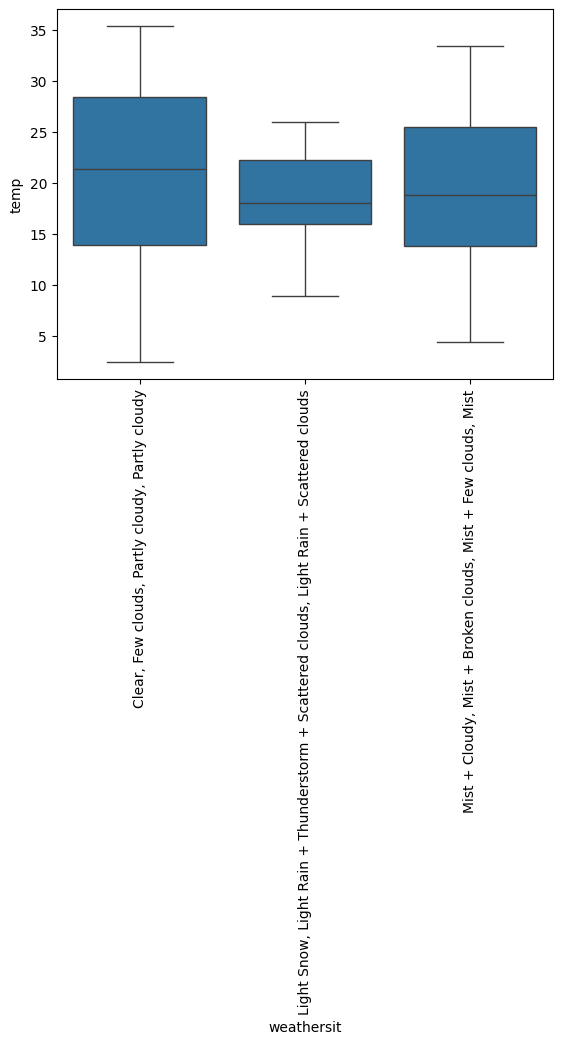

Median: 2019.00
q1: 2018.00
q3: 2019.00
Median: 2018.00
q1: 2018.00
q3: 2019.00
Median: 2018.00
q1: 2018.00
q3: 2019.00


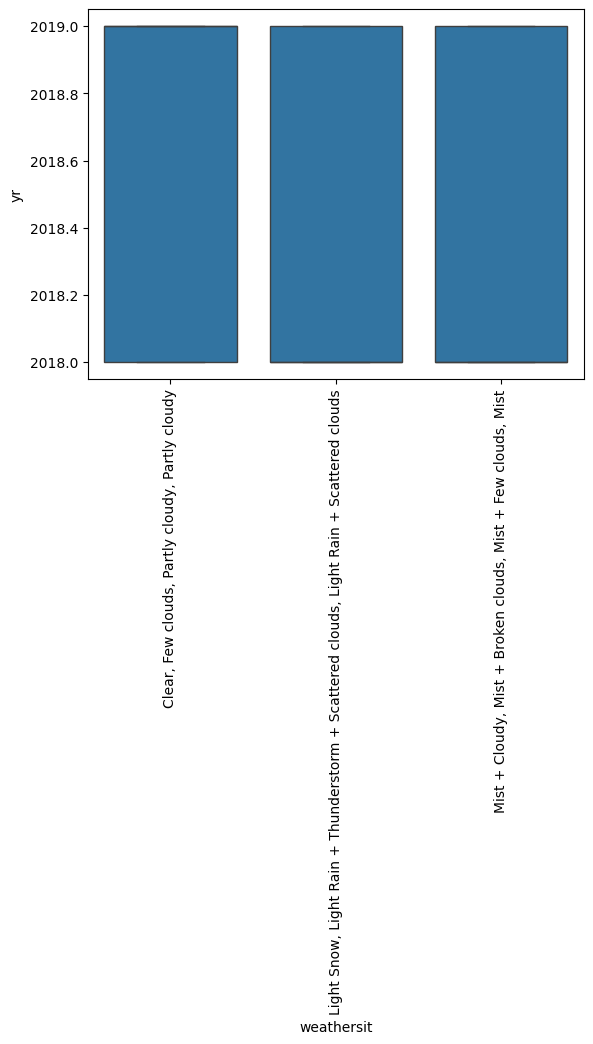

Median: 25.60
q1: 17.01
q3: 31.91
Median: 21.97
q1: 19.28
q3: 25.76
Median: 22.54
q1: 16.41
q3: 28.84


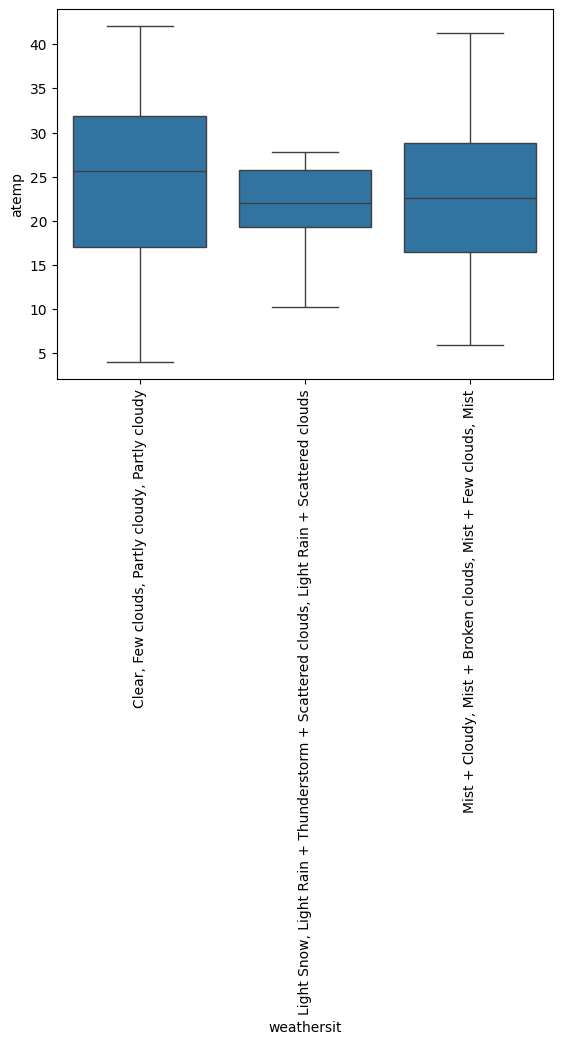

Median: 56.79
q1: 48.90
q3: 64.60
Median: 88.83
q1: 86.54
q3: 91.83
Median: 73.35
q1: 66.04
q3: 80.83


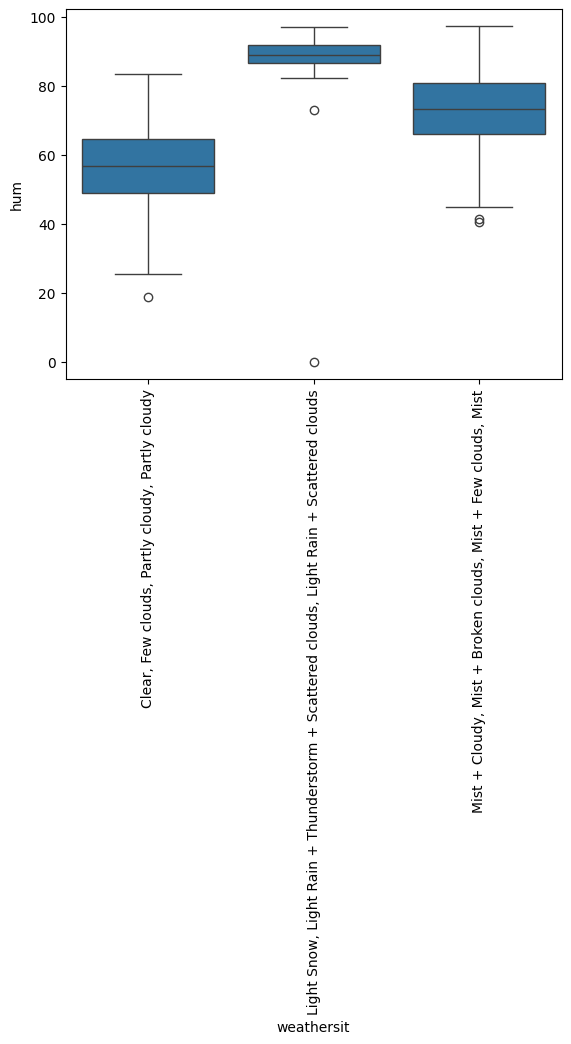

Median: 11.96
q1: 9.17
q3: 15.49
Median: 16.63
q1: 12.91
q3: 21.21
Median: 12.08
q1: 8.81
q3: 15.46


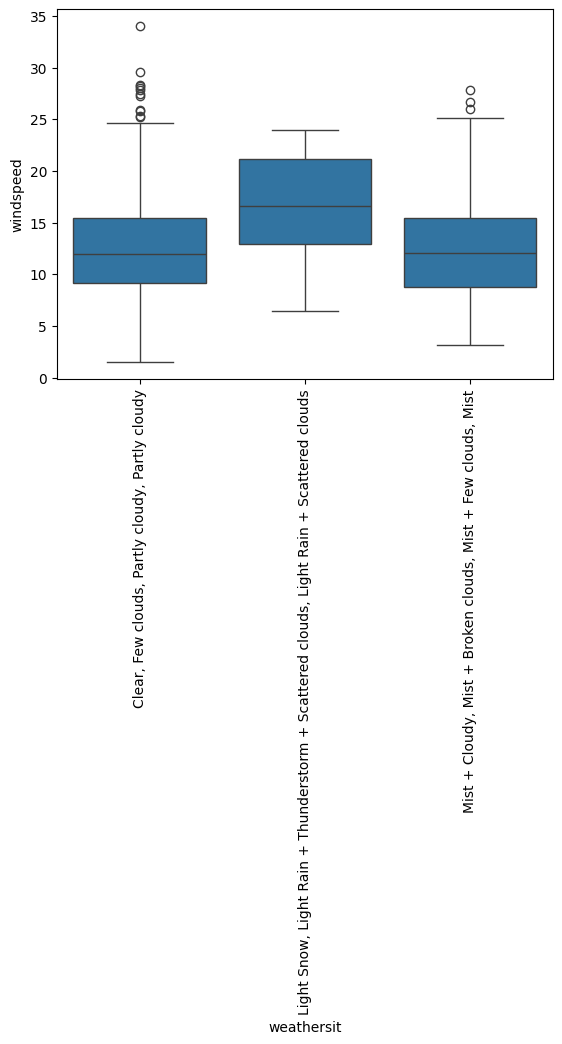

In [258]:
# categorical vs numerical column bivariate analysis
for col1 in cat_cols:
    df = df.sort_values(by=col1)
    for col2 in num_cols:
        sns.boxplot(x=df[col1], y=df[col2])

        # Calculate median and IQR
        medians = df.groupby([col1])[col2].median().values
        q1 = df.groupby([col1])[col2].quantile(0.25).values
        q3 = df.groupby([col1])[col2].quantile(0.75).values

        # Annotate plot with median and IQR values
        for i in range(len(medians)):
            print(f'Median: {medians[i]:.2f}\nq1: {q1[i]:.2f}\nq3: {q3[i]:.2f}')
        plt.xticks(rotation=90)
        plt.show()

### Multivariate analysis

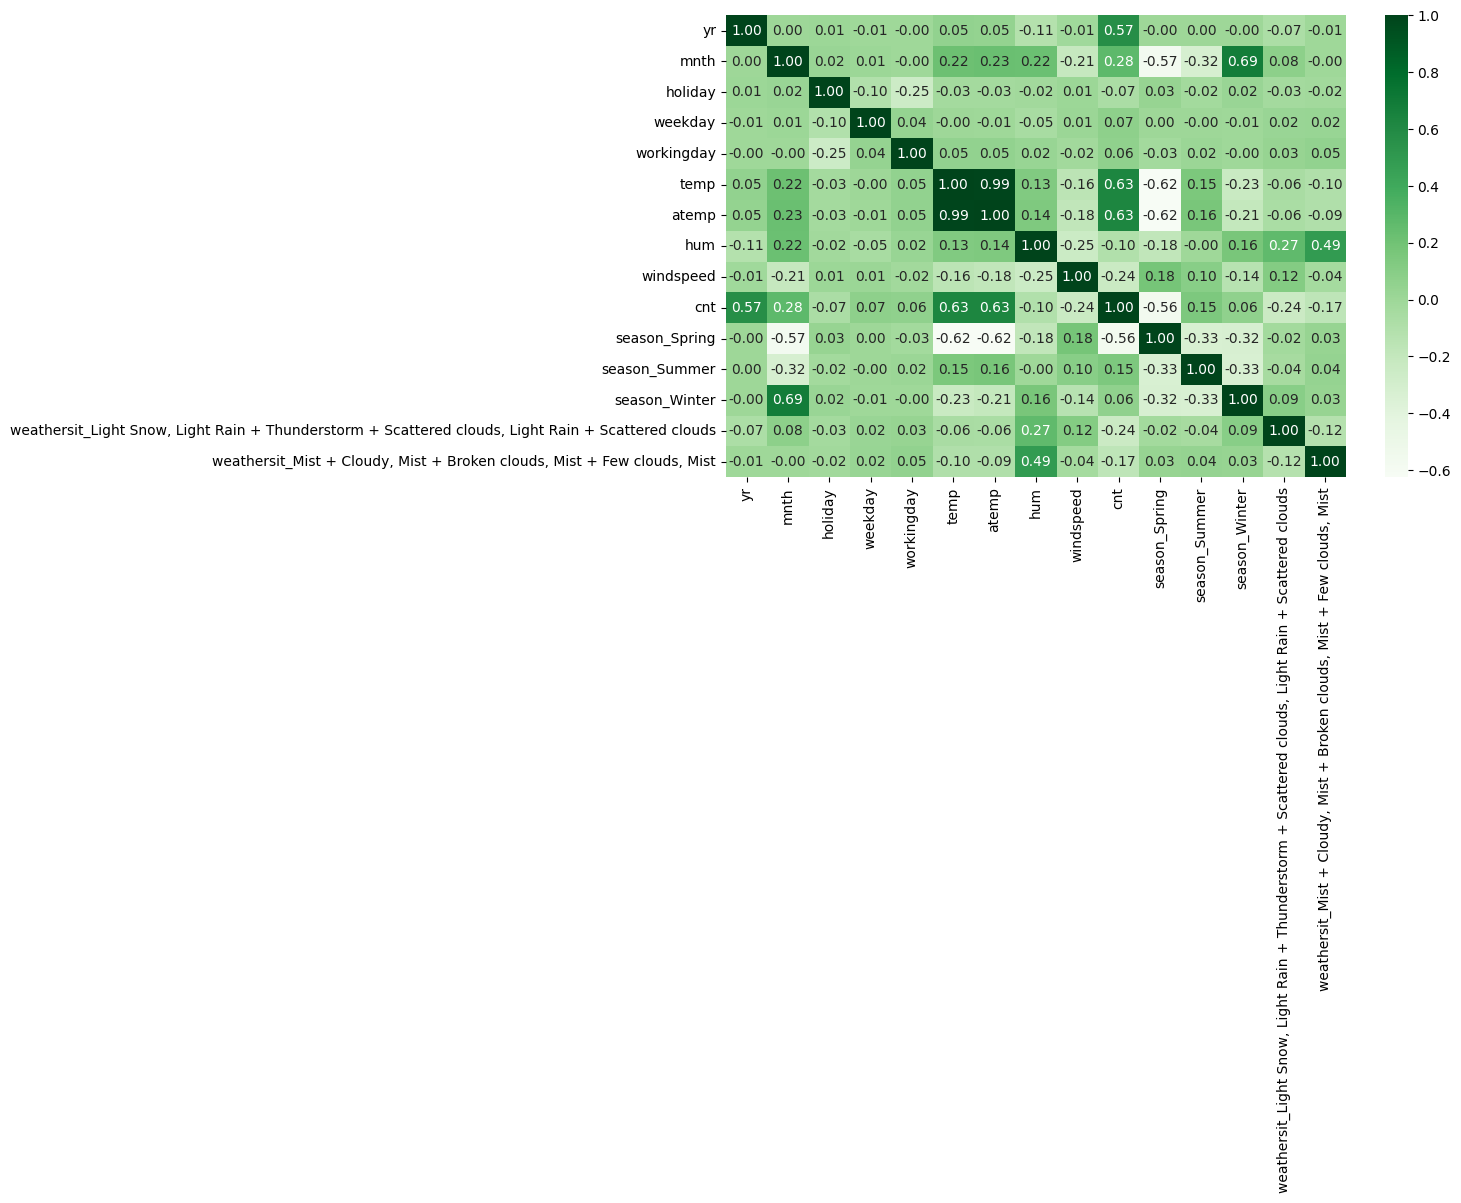

In [259]:
# Create dummy variables for the season column
season_dummies = pd.get_dummies(df['season'], prefix='season', drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, season_dummies], axis=1)

# Create dummy variables for the season column
weathersit_dummies = pd.get_dummies(df['weathersit'], prefix='weathersit', drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, weathersit_dummies], axis=1)

# Drop the original columns
df = df.drop(["season","weathersit"],axis = 1)

plt.figure(figsize=[10,6])
sns.heatmap(df.corr(),annot=True, cmap="Greens", fmt=".2f")
plt.show()

## Split the train test dataset

In [260]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 15)
(220, 15)


## Scale the data

In [261]:
scaler = MinMaxScaler()

df_train[df_train.columns]= scaler.fit_transform(df_train[df_train.columns])
df_test[df_test.columns]= scaler.transform(df_test[df_test.columns])
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
465,1.0,0.272727,0.0,0.500000,1.0,0.360813,0.345516,0.358978,0.543835,0.556834,0.0,1.0,0.0,0.0,0.0
718,1.0,1.000000,0.0,0.666667,1.0,0.337517,0.342763,0.611790,0.193824,0.472388,0.0,0.0,1.0,0.0,1.0
637,1.0,0.727273,0.0,0.000000,0.0,0.582574,0.586903,0.503982,0.199187,0.790037,0.0,0.0,1.0,0.0,0.0
23,0.0,0.000000,0.0,0.166667,1.0,0.047675,0.052001,0.387240,0.249433,0.160377,1.0,0.0,0.0,0.0,0.0
702,1.0,1.000000,0.0,0.333333,1.0,0.519232,0.521857,0.695698,0.283397,0.757478,0.0,0.0,1.0,0.0,0.0


X_train, y_train

In [262]:
y_train = df_train.pop("cnt")
X_train = df_train

y_test = df_test.pop("cnt")
X_test = df_test

y_train.head()

567    0.849977
543    0.788886
99     0.330534
250    0.209388
670    0.670156
Name: cnt, dtype: float64

In [263]:
df.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_Spring', 'season_Summer',
       'season_Winter',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

### RFE

In [275]:
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=11)  # Select top 12 features

# Fit RFE
rfe.fit(X_train, y_train)

# Get selected features
selected_features = rfe.support_

list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('temp', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 4),
 ('season_Winter', True, 1),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  True,
  1)]

In [276]:
input_columns = X_train.columns[rfe.support_]

In [277]:
# Fit linear regression model using selected features
def LinearRegressionModel(X, y, input_columns):
  X_sm = sm.add_constant(X[input_columns])
  lr_model = sm.OLS(y, X_sm).fit()
  return lr_model

lr_model = LinearRegressionModel(X_train, y_train, input_columns)
# Get the slope (coefficients) and intercept
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.88e-175
Time:                        10:24:55   Log-Likelihood:                 480.63
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     498   BIC:                            -886.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.3334      0.031     10.816      0.000       0.273       0.394
yr                                                                                                     0.2335      0.009     27.252      0.000       0.217       0.250
mnth                                                                                                  -0.0375      0.022     -1.675      0.094      -0.081       0.006
holiday                                                                                               -0.0533      0.024     -2.177      0.030      -0.101      -0.005
weekday                                                                                                0.0496      0.013      3.933      0.000       0.025       0.074
atemp                                                                                                  0.4248      0.033     12.815      0.000       0.360       0.490
hum                                                                                                   -0.1181      0.033     -3.542      0.000      -0.184      -0.053
windspeed                                                                                             -0.1493      0.028     -5.368      0.000      -0.204      -0.095
season_Spring                                                                                         -0.1536      0.017     -9.303      0.000      -0.186      -0.121
season_Winter                                                                                          0.0494      0.017      2.915      0.004       0.016       0.083
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2218      0.028     -7.961      0.000      -0.277      -0.167
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0542      0.011     -4.711      0.000      -0.077      -0.032
==============================================================================
Omnibus:                       82.968   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.714
Skew:                          -0.873   Prob(JB):                     3.48e-40
Kurtosis:                       5.346   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
# Remove the one with high P Value or the correlated vars
# Columns to remove
columns_to_remove = ["mnth"]
# Create a boolean mask to select elements that are not in columns_to_remove
mask = np.logical_not(np.isin(input_columns, columns_to_remove))

# Create a new array with elements not in columns_to_remove
input_columns_1 = input_columns[mask]
print(input_columns_1)
# Fit linear regression model using selected features
lr_model = LinearRegressionModel(X_train, y_train, input_columns_1)

# Get the slope (coefficients) and intercept
lr_model.params

lr_model.summary()

Index(['yr', 'holiday', 'weekday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     219.9
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.03e-175
Time:                        10:30:00   Log-Likelihood:                 479.20
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     499   BIC:                            -889.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.3242      0.030     10.669      0.000       0.265       0.384
yr                                                                                                     0.2339      0.009     27.257      0.000       0.217       0.251
holiday                                                                                               -0.0562      0.024     -2.299      0.022      -0.104      -0.008
weekday                                                                                                0.0490      0.013      3.884      0.000       0.024       0.074
atemp                                                                                                  0.4132      0.032     12.724      0.000       0.349       0.477
hum                                                                                                   -0.1207      0.033     -3.617      0.000      -0.186      -0.055
windspeed                                                                                             -0.1471      0.028     -5.286      0.000      -0.202      -0.092
season_Spring                                                                                         -0.1478      0.016     -9.138      0.000      -0.180      -0.116
season_Winter                                                                                          0.0315      0.013      2.390      0.017       0.006       0.057
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2205      0.028     -7.904      0.000      -0.275      -0.166
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0535      0.012     -4.645      0.000      -0.076      -0.031
==============================================================================
Omnibus:                       84.869   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.183
Skew:                          -0.893   Prob(JB):                     6.14e-41
Kurtosis:                       5.351   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your training data
# Assuming lr_model is your linear regression model from statsmodels

# Get the design matrix (including the constant if present)
X_train_with_const = sm.add_constant(X_train[input_columns_1])

# Calculate VIF for each feature
vif = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

# Create a DataFrame to display the VIF values
vif_df = pd.DataFrame({'Feature': X_train_with_const.columns, 'VIF': vif})

print(vif_df)

                                              Feature        VIF
0                                               const  51.538596
1                                                  yr   1.027191
2                                             holiday   1.014106
3                                             weekday   1.024335
4                                               atemp   2.758557
5                                                 hum   2.035801
6                                           windspeed   1.166400
7                                       season_Spring   2.581958
8                                       season_Winter   1.778582
9   weathersit_Light Snow, Light Rain + Thundersto...   1.479136
10  weathersit_Mist + Cloudy, Mist + Broken clouds...   1.657471


In [292]:
#R-Value for test set

# add a constant to X_test
X_test_sm = sm.add_constant(X_test[input_columns_1])
y_test_pred = lr_model.predict(X_test_sm)

r2_score(y_test, y_test_pred)

0.8395595965996336